In [22]:
import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
utils = reload(utils)

In [63]:
Nx,Ny,Nz = 64,1,64
et = 86400.0 * 10.0
N = 10

base_fn = 'output_swe'

def load(Nx,Ny,Nz,et):
    base_fn = 'output_swe'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
    tags = tc.get_tag_dict()
    
    return tc, tags
tc, tags = load(Nx,Ny,Nz,et)

In [97]:
sfx = 'icshear_da_last_working'
sfx = 'icshear_da'
# sfx = 'dvortex_da_rho_rhou_rhow'
# sfx = 'dvortex_da'
fn = tc.get_filename(N,sfx)
path = tc.get_path(fn)

times = np.array([3.0,6.0,10.0])*86400.0
# times = [1200.0]
attributes = ['vorty']
# attributes = ['rho', 'rhou', 'rhow', 'vorty', 'rhoY', 'p2_nodes']
# a_lbls = ['h', 'hu', 'hw', 'pot. vorticity', 'h$\Theta$', '$\pi$']

ens = []
# for time in times:
for attribute in attributes:
    ens.append(tc.get_ensemble(times, N, attribute, sfx, avg=True))
ens = np.array(ens)[0]
print(ens.shape)

# ensemble plotter
# ens = [[ens[nn][:,2,:].T, nn] for nn in range(ens.shape[0])]
# ens = np.array(ens)

# ensemble mean attributes plotter
# ens = [[ens[nn][:,2,:].T, attributes[nn]] for nn in range(ens.shape[0])]
# ens = np.array(ens)

# mean plotter
ens = [[mem[:,2,:].T,'mean'] for mem in ens]

(3, 69, 6, 69)


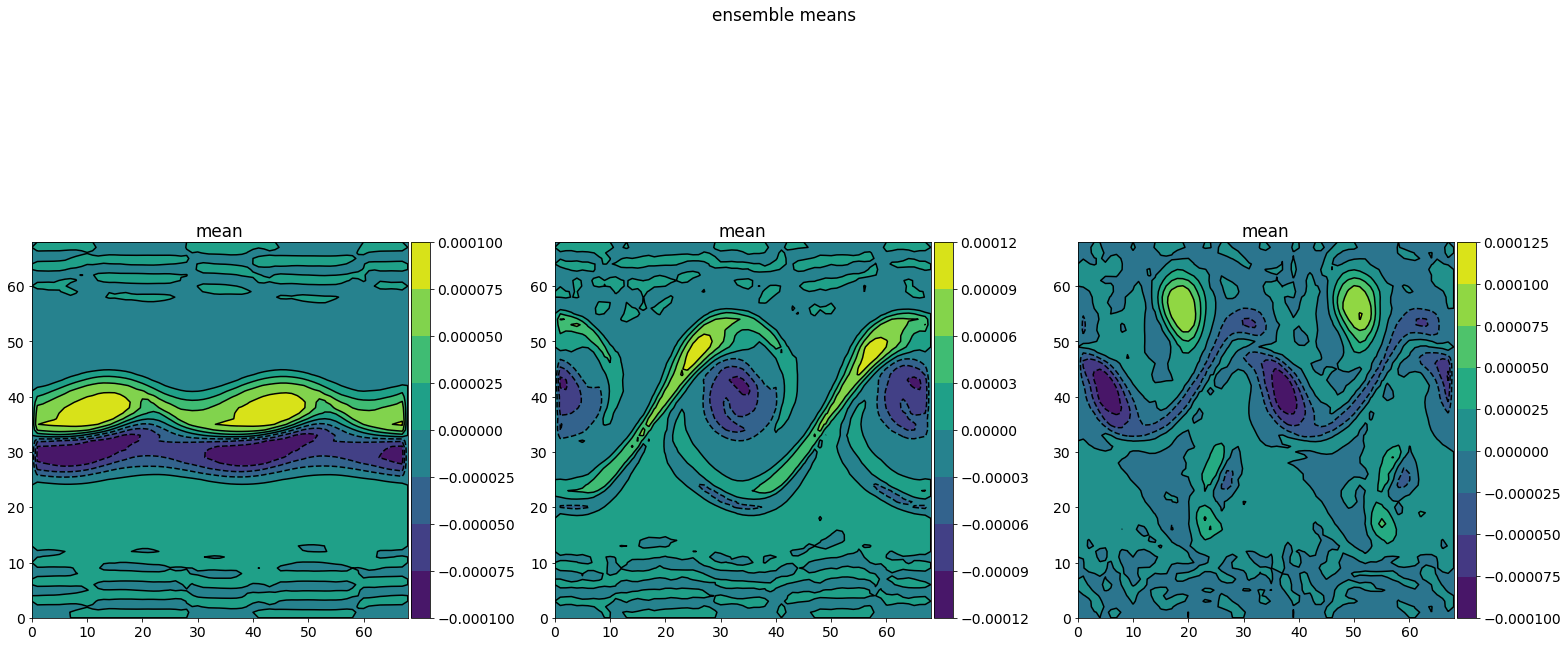

In [98]:
fs = (22,12)
pl = pt.plotter(ens, ncols = 3, figsize=fs)

st = 'ensemble means'
_ = pl.plot(method='contour',aspect='equal', suptitle=st)